# Downloading NCBI Biological Data and Creating Custom Reports Using the Command Line

## Outline
### Command line advantages
### Workshop introduction
### Part 2: The Entrez System and EDirect
### EDirect basics
### Simple use case: APRT RefSeq transcripts
### Advanced use case: Genes and related data for AMP salvage pathway genes
### Part 2: Datasets


# Why use the command line? 


* More direct interface between you and the computer - more streamlined, less tabs and windows open etc. 
* Interacting with remote/cloud computer
* Many bioinformatics tools are only available, or have more full options, in a command line environment
* Reusability of your work - can build up to writing scripts that can automate things, or retrieve different things with small modifications 
* More opportunities in general for batch processing and automations

# Intro to EDirect and Datasets

We'll be covering two different suites of programs in this workshop  
1. **EDirect:** a set of tools that recreate the functionality of the Entrez web system including searching, fetching records, and following links between the database records. EDirect comes with a powerful XML parser, xtract, than can generate tabular reports on aspects of the search results. 
2. **datasets / dataformat:** a set of tools that allow access to the genome sequences, annotations, and metadata. The dataformat tool is analogous to xtract. It produces custom tabular reports on downloaded data.



## EDirect and datasets comparison

|  | EDirect | datasets |
| ------------ | ----------- | ----------- |
| **Available Data** | Accesses all data in Entrez | Accesses genomes, annotations, and metadata |
| **Navigation** | Related (neighbor) data in the Entrez System (e.g., nucletide->PubMed)  | No related data (except that present on genome metadata) |
| **Download formats** | Highly flexible formats   | Sequence formats, tabular, and json lines for genome-related data/metadata |
| **Download size** | Small to medium quantities of data   | Works well with large amounts of data |
| **Parser**  | (xtract) Works with Entrez XML format | (dataformat) Works with json lines format |


## Part 1: EDirect

## Web Entrez system and EDirect

EDirect is a set of programs that access the NCBI Entrez system by passing structured URLs to the [E-Utilities API](https://www.ncbi.nlm.nih.gov/books/NBK25501/).  The EDirect programs provide all the functions that are available in the web version Entrez system: 
- Access to 30+ molecular and literature databases
- Text searching with indexed search fields 
- Retreiving results
- Displaying records
- Linking to related data
- Downloading data

### The Web Entrez System

#### Databases  

You can access the Entrez interconnected set of more than 30 literature and molecular databases the NCBI webpages. The graphic below show the results of an [Entrez all databases search for all records](https://www.ncbi.nlm.nih.gov/search/all/?term=all[filter]).

<div>
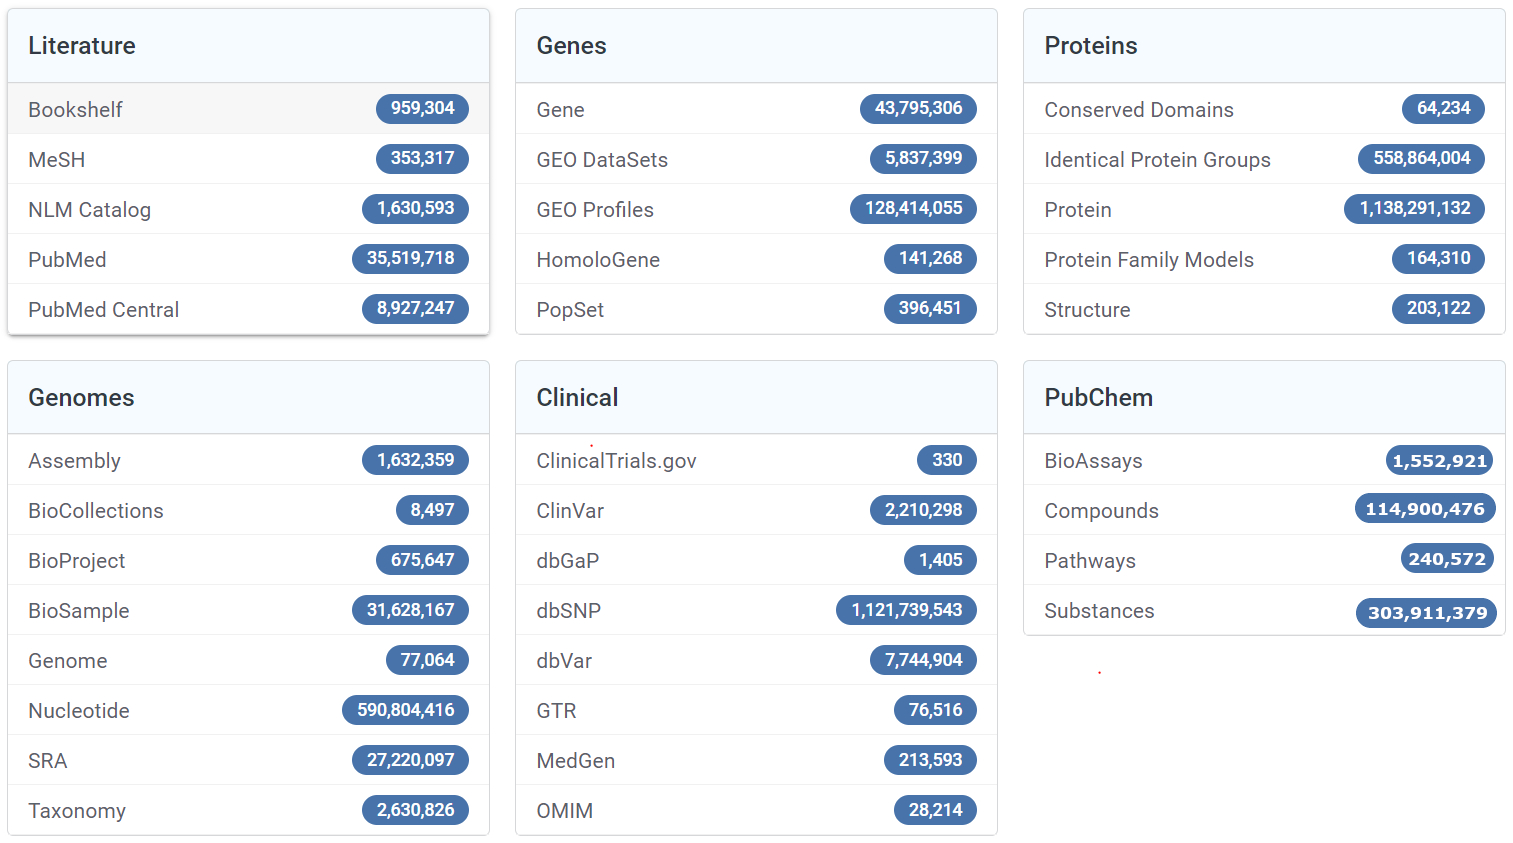
</div>

#### Fielded searching

For each Entrez database there are indexed search fields that you can use to get more precise results. For example here is a fielded search on the web that retrieves the RefSeq transcripts for the APRT gene from the rodent genus Mus.

<div align=center><font size="4">  
    

    APRT[Title] AND Mus[Organism] AND refseq[Filter] AND mrna[Filter]
    
    
</font></div>  

#### [RUN SEARCH!](https://www.ncbi.nlm.nih.gov/nuccore/?term=APRT%5BTitle%5D+AND+Mus%5BOrganism%5D+AND+refseq%5BFilter%5D+AND+mrna[Filter])

#### Search results: Document Summaries and links

All databases produce a document summary or docsum that's used to create the displayed search results on the web as shown below for the nucleotide database. This display is generated from the underlying XML version of the docsum. As we'll see in a minute the EDirect parser xtract can access and report specific information from the XML docsum and from the more extensive XML reports available from many of the databases. Many databases have record formats, such as GenBank or FASTA for sequences, in addition to the the docsum that are available in Entrez system.

#### Links  
One very powerful feature of the Entrez system is the ability to link to related data in other databases, for example from nucleotide records to protein or pubmed or taxonomy and so on.

The screenshot below shows nucleotide document summaries for the APRT search results with links to PubMed, Protein, Taxonomy as well as the 

<div>
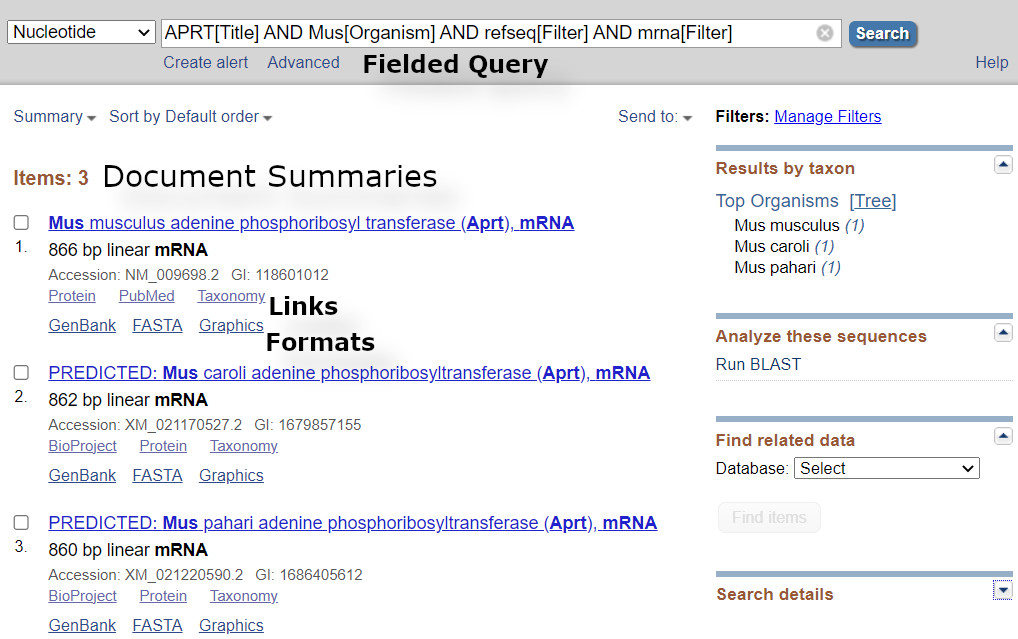
</div>

We will use this basic search to explore these functions in EDirect.


## EDirect basics  

### Programs

The package comes with the following programs  

- **einfo:** information about available databases including names and available search fields
- **esearch:** searches databases returns a webenv key to results for fetching or linking results from the history server
- **efetch:** retrieves records in various formats
- **esummary:** a shortcut for efetch -format docsum
- **elink:** retrieves ids for related records in the same or other databases
- **epost:** posts a set of ids to the NCBI history for passing to another program ( efetch, elink etc.)
- **efilter:** performs a filtering step on a set of results from esearch or elink
- **xtract:** processes XML into human readable reports

### EDirect workflows  

The EDirect programs work together through Unix pipes '|'. You pipe the output of one program into the next program. Here are some typical patterns. 

<div><font size="4"><pre>
esearch/epost | efetch | xtract
epost | efetch | xtract
esearch/epost | elink | efetch | xtract

</pre></div>

<div>
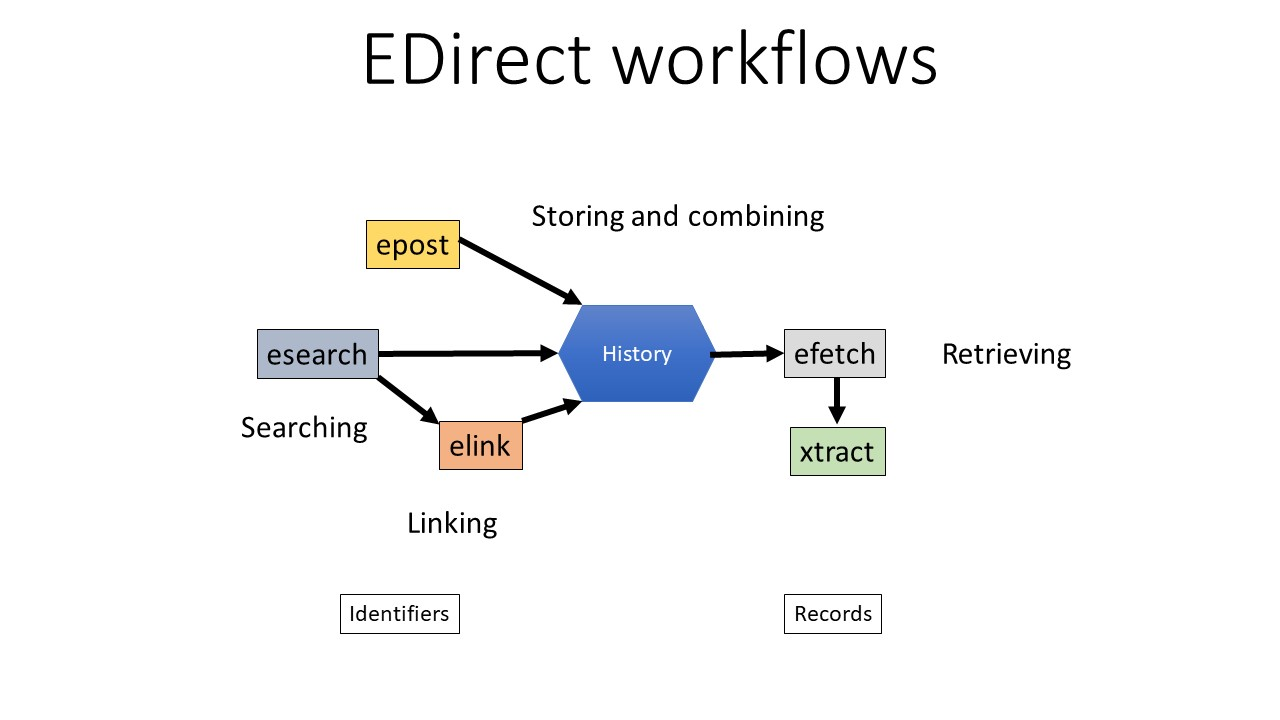
</div>

#### Before we begin: Running code in a Jupyter Notebook

In this notebook the language of the code cells the Bash Unix shell, that you can use to run command-line tools. In some cases the commands will create files on your working directory on the server. When that happens a new file will appear in the list on the left-hand side of your notebook.  

To run code in a cell you can select the cell and  use the "Run" button at the top of the notebook, or you can use hold the shift key down and press the enter key (shift+enter) to run the cell.

**Example:** Run the pwd command following cell. 

In [11]:
pwd

/home/jupyter-cooper


The output appears immediately below the cell. Also, the bracketed space to the left of the cell now contains a number \[1]. The number is the number of times you have run cells in the notebook. When the cell is running the brackets will show an asterisk \[*].

**Important tip:** As you go through the notebook, in order to run, some cells require that you have run the cells before them. If you missed a previous cell, you can use the "Run" menu to "Run All Above the Selected Cell"

**REQUIRED COMMAND**: Run the following command to finish the setup we need for the rest of the workshop

In [7]:
source /srv/scratch/.bash_profile 
#Don't worry, you won't see anything happen. 

### Using einfo to get databases and counts
The `einfo` program retrieves information about the Entrez databases, the number of records, the searchable fields in each database, and links between the various NCBI databases.

**NOTE on getting help:** For any of the EDirect programs. You can get a list of available options by invoking the program with the `-help` flag. For example run the commandline in the next cell.

In [ ]:
einfo -help

Let's try the `-dbs` option to get an alphabetical list of all databases

In [ ]:
einfo -dbs

We can use the `-db` option to get detailed information for each database. Use the next cell to get results for the nucleotide database, which is called nuccore behind the scenes. The full XML output is very long, so we'll pipe the output to 'head' to just get the first 20 lines 

In [ ]:
einfo -db nuccore | head -20

We can quickly see the number of records and the last update date. The full XML provides the search Fields available, a description of the Field, the number of terms indexed for each and the available Links by link name.

We can get the available Fields and Links in more abbreviated form using the `-fields` or `-links` options

In [ ]:
einfo -db nuccore -fields

In [ ]:
einfo -db nuccore -links

---

## Simple EDirect case: APRT mRNA Reference Sequences

We will use EDirect to explore the Entrez system for the APRT web search.

### Using `esearch` to get nuccore results for APRT RefSeq trascripts

The basic `esearch` command line will look like the following:

<div><font size=4><pre>
esearch -db database_name -query "search terms with Field limits"
</pre><br>
</font></div>  
  

You can alway see what the possible arguments are by typing `esearch -help` 

Substituting the search terms we had with the web search, we can run the search.
    

In [ ]:
esearch -db nuccore -query "APRT[Title] AND Mus[Organism] AND refseq[Filter] AND mrna[Filter]"

The XML result provides the WebEnv that we would need to access to retrieve or link the results. It also gives the count, which is useful to check your query for too many or too few results. 

**TRY IT YOURSELF:** You can use the cell below to see how the number of results change when you remove or change some of the query terms. 
- rodents\[Organism\]  
- Brca1\[Title\]  
- Remove one or both of the Filter terms

In [ ]:
# Practice cell.


### Using `efetch` to get nuccore results for APRT RefSeq transcripts

The basic `efetch` command line is:

<div><font size=4><pre>
efetch -db database_name -id identifier -format format_contents (-mode format_mode)
</pre><br>
</font></div>  

More commonly you can pipe the output of `efetch`, `epost`, or `elink` into `efetch`.  In those cases the commandline is:  

<div><font size=4><pre>
esearch/epost/elink (+ arguments/options) | efetch -db database_name -id identifier -format format_contents (-mode format_mode)
</pre><br>
</font></div>  

`efetch` has a large number of format options that vary by database. There many different options for the sequence and pubmed databases. The table below shows the options that are available for all and specific to the sequence databases. You can get the complete list from `efetch -help`

<pre>Format Examples

  -db            -format            -mode    Report Type
  ___            _______            _____    ___________

  (all)
                 docsum                      DocumentSummarySet XML
                 docsum             json     DocumentSummarySet JSON
                 full                        Same as native except for mesh
                 uid                         Unique Identifier List
                 url                         Entrez URL
                 xml                         Same as -format full -mode xml
  (sequences)
                 acc                         Accession Number
                 est                         EST Report
                 fasta                       FASTA
                 fasta              xml      TinySeq XML
                 fasta_cds_aa                FASTA of CDS Products
                 fasta_cds_na                FASTA of Coding Regions
                 ft                          Feature Table
                 gb                          GenBank Flatfile
                 gb                 xml      GBSet XML
                 gbc                xml      INSDSet XML
                 gene_fasta                  FASTA of Gene
                 gp                          GenPept Flatfile
                 gp                 xml      GBSet XML
                 gpc                xml      INSDSet XML
                 gss                         GSS Report
                 ipg                         Identical Protein Report
                 ipg                xml      IPGReportSet XML
                 native             text     Seq-entry ASN.1
                 native             xml      Bioseq-set XML
                 seqid                       Seq-id ASN.1

</pre>

The code cell below will retrieve the docsum XML format for the three APRT records. 

In [ ]:
esearch -db nuccore -query "APRT[Title] AND Mus[Organism] AND refseq[Filter] AND mrna[Filter]" |
efetch -format docsum
# (Note: The commandline `efetch -format docsum` is equivalent to calling `esummary`)  

### Getting started with `xtract`

The XML docsum is much richer and more complex than what's displayed on the web. We can also use the XML parser `xtract` to create simple reports from the XML. `xtract` is quite simple to use here in the case of the docsum to quickly create a human readable report. Let's take a moment to get started using `xtract`.  

The program navigates the nested structure of the XML from `efetch` and generates tabular reports for the selected XML elements.  A minimal `xtract` command 

<div><font size=4><pre>
efetch | xtract -pattern record_tag -element element_1, element_2 element_3 etc.
</pre><br>
</font></div> 

In the case of the nuccore docsum each record is delimited by \<DocumentSummary\>\<\\DocumentSummary\>. 


We simply use the XML tag, DocumentSummary, in the XML set as the `pattern` argument and provide a space or comma separated list of the elements we want in the report. For example we can pull out these elements for each DocumentSummary.

```xml
<Title>Mus musculus adenine phosphoribosyl transferase (Aprt), mRNA</Title>  
<Organism>Mus musculus</Organism>  
<AccessionVersion>NM_009698.2</AccessionVersion> 
```

In [ ]:
esearch -db nuccore -query "APRT[Title] AND Mus[Organism] AND refseq[Filter] AND mrna[Filter]" |
esummary |
xtract -pattern DocumentSummary -element Title Organism AccessionVersion

### Fetching sequence formats ###
Getting the sequence formats directly is easy. simply use the `-format` option for the sequence format you want. The commandline below retrieves the FASTA format.

In [ ]:
esearch -db nuccore -query "APRT[Title] AND Mus[Organism] AND refseq[Filter] AND mrna[Filter]" |
efetch -format fasta
#
#NOTE: To save any EDirect output to a file simply use the Unix redirect  '>'
# efetch -format fasta > mus_aprt_mrna.txt

***TRY IT YOURSELF:*** Edit the cell below to practice retrieving. 
- the GenBank flatfile format 
- Only the coding regions in FASTA format  
- The Feature table

Use `efetch -help` to see options.

In [ ]:
esearch -db nuccore -query "APRT[Title] AND Mus[Organism] AND refseq[Filter] AND mrna[Filter]" |
efetch -format fasta

### Linking to other databases with `elink` ###

`elink` accepts ids and follows links to related ids in the same or another database.  in the form shown below `elink` simply stores the ids for the linked record in the target databes. It can pass these to efetch for retrieval.  The simplest kind of `elink` commandline is shown below:

<div><font size=4><pre>
esearch/epost | elink -target target_database | efetch -format target_record_format
</pre><br>
</font></div> 

Run the following to retrieve the linked protein sequences in FASTA format.

In [2]:
esearch -db nuccore -query "APRT[Title] AND Mus[Organism] AND refseq[Filter] AND mrna[Filter]" |
elink -target protein |
efetch -format fasta

>NP_033828.2 adenine phosphoribosyltransferase [Mus musculus]
MSEPELKLVARRIRSFPDFPIPGVLFRDISPLLKDPDSFRASIRLLASHLKSTHSGKIDYIAGLDSRGFL
FGPSLAQELGVGCVLIRKQGKLPGPTVSASYSLEYGKAELEIQKDALEPGQRVVIVDDLLATGGTMFAAC
DLLHQLRAEVVECVSLVELTSLKGRERLGPIPFFSLLQYD
>XP_021076249.1 adenine phosphoribosyltransferase [Mus pahari]
MSESELQLVARRIRSFPDFPIPGVLFRDISPLLKDPDSFRASIRLLASHLKSTHSGKIDYIAGLDSRGFL
FVPSLAQELGMGCVLIWKHGKLRSPTVSASYALEYGKAELEIQKDALEPGQRVVIVDDLLATGGTMFAAC
DLLHQLRAEVVECVSLVELTSLKGRERLGPIPFFSLLQYD
>XP_021026186.1 adenine phosphoribosyltransferase [Mus caroli]
MSEPELKLVARRIRSFPDFPIPGVLFRDISPLLKDPDSFRASIRLLASHLKSTHSGKIDYIAGLDSRGFL
FGPSLAQELGVGCVLIRKQGKLPGPTVSASYSLEYGKAELEIQKDALEPGQRVVIVDDLLATGGTMFAAC
DLLHQLRAEVVECVSLVELTSLKGRERLGPIPFFSLLQYD


We can also link to gene from the these records. Run the cell below to retrieve the gene docsum linked to the record from Mus musculus (NM_009698.2). In this case we're using `epost` to place the accession for the record into the history

In [6]:
epost -db nuccore -id NM_009698.2 |
elink -target gene | 
efetch -format docsum

tput: No value for $TERM and no -T specified
tput: No value for $TERM and no -T specified
tput: No value for $TERM and no -T specified
tput: No value for $TERM and no -T specified
tput: No value for $TERM and no -T specified
<?xml version="1.0" encoding="UTF-8" ?>
<!DOCTYPE DocumentSummarySet>
<DocumentSummarySet status="OK">
  <DbBuild>Build230410-2320m.1</DbBuild>
  <DocumentSummary>
    <Id>11821</Id>
    <Name>Aprt</Name>
    <Description>adenine phosphoribosyl transferase</Description>
    <Status>0</Status>
    <CurrentID>0</CurrentID>
    <Chromosome>8</Chromosome>
    <GeneticSource>genomic</GeneticSource>
    <MapLocation>8 71.91 cM</MapLocation>
    <OtherDesignations>adenine phosphoribosyltransferase</OtherDesignations>
    <NomenclatureSymbol>Aprt</NomenclatureSymbol>
    <NomenclatureName>adenine phosphoribosyl transferase</NomenclatureName>
    <NomenclatureStatus>Official</NomenclatureStatus>
    <GenomicInfo>
      <GenomicInfoType>
        <ChrLoc>8</ChrLoc>
        <C

### Using `xtract` part 2 ###
Let's use xtract to create a tabular report that contains the gene id, the gene name, the organism scientific name and common name, the chromosome accession, and the chromosome start and stop. Looking at the XML above, the elements we want are  

```xml
<Id>11821</Id>  
<Name>Aprt</Name>  
<ScientificName>Mus musculus</ScientificName>  
<CommonName>house mouse</CommonName>  
<ChrAccVer>NC_000074.7</ChrAccVer>  
<ChrStart>123303645</ChrStart>  
<ChrStop>123301375</ChrStop>  
```
Notice that some of these elements  are on different levels of the XML structure. For example the \<Id> and the \<Name> are one level down from the DocumentSummary, but the \<ChrAccVer> and \<ChrStart> and \<ChrStop> as well as the organism information are at deeper levels in the XML. 

```xml
   <GenomicInfo>   
      <GenomicInfoType>    
        <ChrLoc>8</ChrLoc>    
        <ChrAccVer>NC_000074.7</ChrAccVer>   
        <ChrStart>123303645</ChrStart>    
        <ChrStop>123301375</ChrStop>    
        <ExonCount>5</ExonCount>   
      </GenomicInfoType>   
    </GenomicInfo>
```   
    
```xml
    <Organism>  
      <ScientificName>Mus musculus</ScientificName>  
      <CommonName>house mouse</CommonName>   
      <TaxID>10090</TaxID>  
    </Organism>
```  

Also, notice that some of the elements such as the chromosome accession and position  are repeated in the \<LocationHist> section.  

```xml
    <LocationHist>
      <LocationHistType>
        <AnnotationRelease>109</AnnotationRelease>
        <AssemblyAccVer>GCF_000001635.27</AssemblyAccVer>
        <ChrAccVer>NC_000074.7</ChrAccVer>
        <ChrStart>123303645</ChrStart>
        <ChrStop>123301375</ChrStop>
      </LocationHistType>
```

We need to focus `xtract` on the interior portions of the XML to get the data we want and avoid the sections with the duplicate elements. In addition to the `-pattern` argument `xtract` allows several levels of inspection of the XML as shown in the diagram below.

<div>
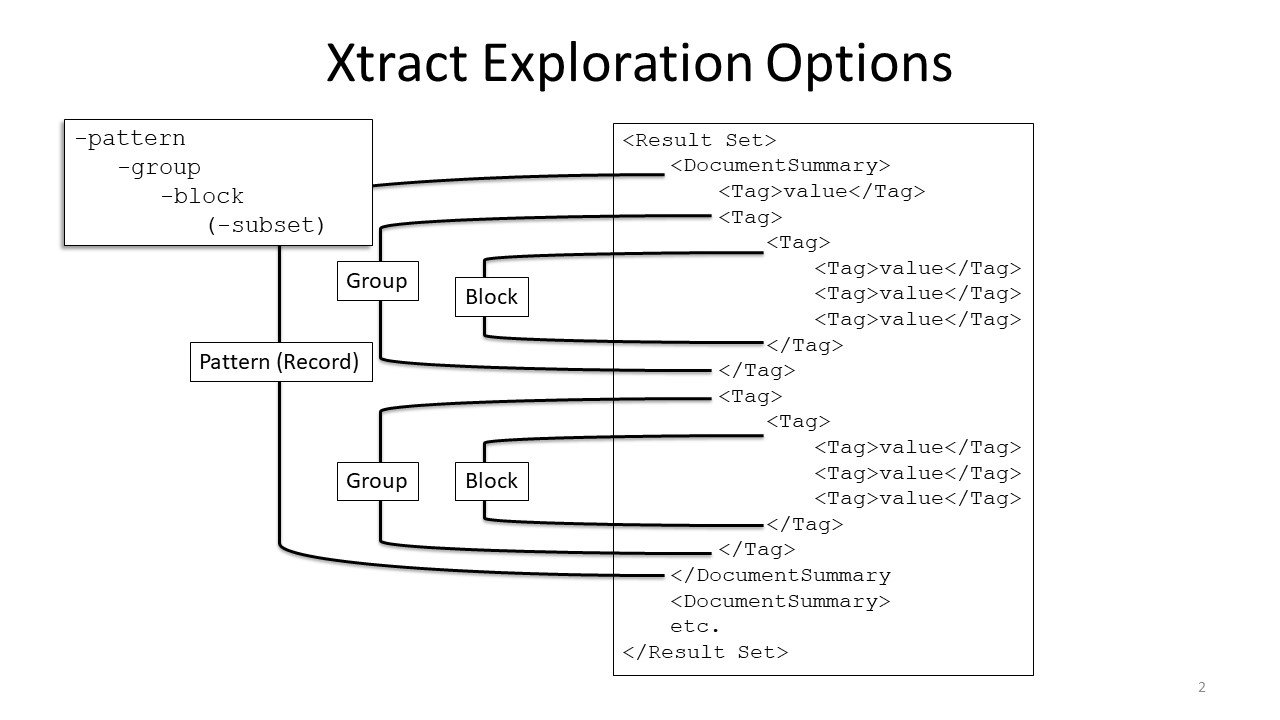
</div>

- `-pattern` places the data from individual records into separate rows.
- `-element` extracts values from specified fields into separate columns.
- `-group`, `-block`, and `-subset` limit element exploration to selected XML subregions.

The following command will restrict element selection to the regions of the XML we want.

In [ ]:
esearch -db nuccore -query "APRT[Title] AND Mus[Organism] AND refseq[Filter] AND mrna[Filter]" |
elink -target gene |
efetch -format docsum |
xtract -pattern DocumentSummary -element Id Name \
-block Organism -element ScientificName,CommonName \
-block GenomicInfoType -element ChrAccVer,ChrStart,ChrStop

**TRY IT YOURSELF:** Edit the command below to include the taxid, and the chromosome number in the report. You can drop the common or scientific name to keep line length from getting too long.  


In [ ]:
esearch -db nuccore -query "APRT[Title] AND Mus[Organism] AND refseq[Filter] AND mrna[Filter]" |
elink -target gene |
efetch -format docsum |
xtract -pattern DocumentSummary -element Id Name \
-block Organism -element ScientificName,CommonName \
-block GenomicInfoType -element ChrAccVer,ChrStart,ChrStop

**TRY IT YOURSELF:** Notice that the current annotation release (109) is given first in the \<LocationHist> block for the house mouse. Use the `-first` option instead of `-element` to get add the current \<AnnotationRelease> number to the report.

```xml
    <LocationHist>
      <LocationHistType>
        <AnnotationRelease>109</AnnotationRelease>
        <AssemblyAccVer>GCF_000001635.27</AssemblyAccVer>
        <ChrAccVer>NC_000074.7</ChrAccVer>
        <ChrStart>123303645</ChrStart>
        <ChrStop>123301375</ChrStop>
      </LocationHistType>
```

In [ ]:
esearch -db nuccore -query "APRT[Title] AND Mus[Organism] AND refseq[Filter] AND mrna[Filter]" |
elink -target gene |
efetch -format docsum |
xtract -pattern DocumentSummary -element Id Name \
-block LocationHist -first AnnotationRelease

After all of that parsing, you may be disappointed to learn that gene offers a tabular format `-format tabular` that captures most of the information we've been getting although creating your own from the XML is more flexible. (You can see the formats for gene are listed in the `efetch -help`). We'll use the tabular format for the next example.

---

## A more advanced case: information for genes involved in the AMP salvage pathway ##
The APRT gene we've been working with is one of several genes involved in the purine nucleotide salvage pathway. This functional annotation is imported for some genes from Gene Ontology (GO) (http://geneontology.org/).  

You can see that Gene Ontology is a possible Field you can use in a search through `einfo -db gene -fields`

In [ ]:
einfo -db gene -fields | 
grep 'Gene Ontology'

Run a search in gene for "amp salvage\[go]" and save the results in the gene tabular format

In [ ]:
esearch -db gene -query "amp salvage[go]" | 
efetch -format tabular > amp_salvage.tsv

The redirect sends output to a file on your home directory. The file amp_salvage.tsv should appear on the left-hand side of workspace in the file browser.  Double-click to open it. 

### Using Unix utilties to list gene names and organisms ###
We can use a script that comes with EDirect, sort-uniq-count-rank, to get a count of genes for each species in the file. (We use sed to remove the header line from the file and cut to output the contents of the second column.)

In [ ]:
sed 1d amp_salvage.tsv | 
cut -f2 | 
sort-uniq-count-rank

**TRY IT YOURSELF**
Edit the cell below and use sort-uniq-count-rank to get a list of:
- the gene names (symbols)
- the gene descriptions

In [ ]:
sed 1d amp_salvage.tsv | 
cut -f2 | 
sort-uniq-count-rank

Of course we can use this tsv file with some Unix utilities and EDirect to gather additional information about these genes.

### Getting PubMed Ids for amp salvage genes ###
We will post the Gene Ids in column 4 and use them to get the linked publications. Run the following to get a count of the linked publications.

In [4]:
sed 1d amp_salvage.tsv | 
cut -f3 | 
epost -db gene | 
elink -target pubmed

sed: can't read amp_salvage.tsv: No such file or directory
tput: No value for $TERM and no -T specified
tput: No value for $TERM and no -T specified
tput: No value for $TERM and no -T specified
tput: No value for $TERM and no -T specified
tput: No value for $TERM and no -T specified
 ERROR:  EPost failure
 ERROR:  Missing -db argument


: 1

So we have over 2,000 PubMed records linked to these 51 genes. What happens if we run `efetch` directly? We'll just ask for the PubMed uid and get the first few to make the point.

In [14]:
sed 1d amp_salvage.tsv | 
cut -f3 | 
epost -db gene | 
elink -target pubmed | 
efetch -format uid | 
head -20

36735532
36591905
36509362
36494345
36477656
36433728
36417873
36409020
36401307
36282215
36264884
36260871
36244648
36240579
36224248
36215168
36181835
36178927
36172858
36114006


### Working with the Linkset XML ##
So we can get all the PubMed records, but we can't match them up with a particular gene in our list. We need to use the `-cmd neighbor` option to get a structured linkset output that we can process to get the associations between the gene ids and the pubmed ids. We'll just work with the last twenty records in the file. 

In [ ]:
tail -20 amp_salvage.tsv | 
cut -f3 | 
epost -db gene | 
elink -target pubmed -cmd neighbor | 
head -50

The XML has a repeating \<LinkSet> for each Gene Id that has all the PubMed Ids associated with that GeneId in the \<LinkSetDb> XML section.  
```xml
<?xml version="1.0" encoding="UTF-8" ?>
<!DOCTYPE eLinkResult>
<eLinkResult>
  <LinkSet>
    <DbFrom>gene</DbFrom>
    <IdList>
      <Id>396540</Id>
    </IdList>
    <LinkSetDb>
      <DbTo>pubmed</DbTo>
      <LinkName>gene_pubmed</LinkName>
      <Link>
        <Id>21058063</Id>
      </Link>
      <Link>
        <Id>25867349</Id>
      </Link>
      <Link>
        <Id>2111814</Id>
      </Link>
      <Link>
        <Id>31111951</Id>
      </Link>
      <Link>
        <Id>21873635</Id>
      </Link>
    </LinkSetDb>
  </LinkSet>
```
As before we can focus on the two blocks to collect the Gene Id and the related PubMed Id. We can use the element separator optio `-sep` to specify that the PubMed Ids are comma separated. This will make it easier to import into our tabular gene output. We'll save these to a file so we can add them to our table in a few minutes.

In [10]:
tail -20 amp_salvage.tsv | 
cut -f3 | 
epost -db gene | 
elink -target pubmed -cmd neighbor | 
xtract -pattern LinkSet -block IdList -element Id  -block LinkSetDb -sep "," -element Id > pubmed_ids.txt
cat pubmed_ids.txt

396540	21058063,25867349,2111814,31111951,21873635
828353	12010467,25293756,21798944,10617198,21873635
830985	23658065,21798944,11130714,34562334,21873635
826856	23658065,10617198,34562334,21873635
178028	24218109,22542102,26912668,34223818,14704431,31308550,21647448,30120140,9851916,21873635
2539129	25547512,24957674,21504829,22681890,16823372,11859360,21873635
393641	19374445,28252024,26469318,12477932,21873635,27189481
368220	23456338,16109975,26469318,12477932,21873635
172232	26999449,31308550,9851916,21873635
8625430	19482547,15875012,21873635
493317	12454917,12477932,21873635
549452	12454917,12477932
519017	19393038,12477932
322229	15693615,32094353,16109975,26469318,12477932,21873635
8617570	15875012,21873635
2874768	18405346,16372000,19146970,21873635
444786	12454917,12477932
7048313	21511999
7048040	21511999
2868092	20797444,18405346,16372000,19146970,21873635


**TRY IT YOURSELF:** 
Edit the command below to get the the protein ids for each gene record. These will include both submitted records (GenPept) and Reference Sequences.


In [7]:
tail -20 amp_salvage.tsv | 
cut -f3 | 
epost -db gene | 
elink -target protein -cmd neighbor | 
xtract -pattern LinkSet -block IdList -element Id  -block LinkSetDb -sep "," -element Id

396540	2156406310,205371816,155624210,60280781,54695133,54695131,51889278,51874220,50402248,211095
828353	1789579109,1780589431,1063724270,1039017924,1032285150,332659225,227248346,75337694,28393997,27754669,15235709,7269103,3892712
830985	1789571668,1780581955,1063731224,1039019022,1032281391,332004257,227248348,75334953,28827532,28393271,15238973,8953378
826856	1789577955,1780588282,1063721933,1063721931,1063720102,1039018840,1039018839,1039018838,1032282409,332657733,227248344,75337660,22136608,15234553,7267946,4725943
178028	17541820,3879009
2539129	19075654,6272240
393641	161611562,41054788,37046699
368220	440918717,197246943,47086461,39645529,27882111
172232	351020987,20454806,17509087,12276023
8625430	111226439,90970571
493317	1062878973,89266811,56118284,51513483
549452	1062914414,213625434,213624068,195540155,89268300,89268100,62859789
519017	296477966,75069802,74267657,70778754,58760446
322229	38488696,30185660
8617570	66826489,60474500
2874768	259487665,67523633,40744689
444

**TRY IT YOURSELF:** 
Add the link name gene_protein_refseq to get only linked refseq ids

In [ ]:
tail -20 amp_salvage.tsv | 
cut -f3 | 
epost -db gene | 
elink -target protein -cmd neighbor -name gene_protein_refseq | 
xtract -pattern LinkSet -block IdList -element Id  -block LinkSetDb -sep "," -element Id

### Adding a column with links to PubMed to the tabular output

(Nothing here yet. Some kind of awk command required)

### Downloading genomic regions for the AMP salvage genes

In [5]:
awk -F "\t" -v OFS="\t" '{print $12,$13,$14}' < amp_salvage.tsv | 
tail -10 | 
sed '8,9d'
#Note: sed removes the two lines for Schizosacchomyces genes with no genomic regions

NC_030680.2	58338004	58344221
NC_030683.2	55166016	55263036
NC_037345.1	14012891	14015666
NC_007123.7	46842395	46868003
NC_007087.3	4368158	4368757
NC_066263.1	3348204	3350098
NC_054384.1	44355961	44488390
NC_066262.1	488339	489036


In [3]:
awk -F "\t" -v OFS="\t" '{print $12,$13,$14}' < amp_salvage.tsv | 
tail -10 | 
sed '8,9d' | 
xargs -n 3 \
sh -c 'efetch -db nuccore  -format fasta -id "$0" -chr_start "$1" -chr_stop "$2"' \
> genomic_regions.fasta

In [4]:
grep '>' genomic_regions.fasta

>NC_030680.2:58338005-58344222 Xenopus tropicalis strain Nigerian chromosome 4, UCB_Xtro_10.0, whole genome shotgun sequence
>NC_030683.2:55166017-55263037 Xenopus tropicalis strain Nigerian chromosome 7, UCB_Xtro_10.0, whole genome shotgun sequence
>NC_037345.1:14012892-14015667 Bos taurus isolate L1 Dominette 01449 registration number 42190680 breed Hereford chromosome 18, ARS-UCD1.2, whole genome shotgun sequence
>NC_007123.7:46842396-46868004 Danio rerio strain Tuebingen chromosome 12, GRCz11 Primary Assembly
>NC_007087.3:4368159-4368758 Dictyostelium discoideum AX4 chromosome 1 chromosome, whole genome shotgun sequence
>NC_066263.1:3348205-3350099 Aspergillus nidulans FGSC A4 chromosome VII
>NC_054384.1:44355962-44488391 Xenopus laevis strain J_2021 chromosome 7S, Xenopus_laevis_v10.1, whole genome shotgun sequence
>NC_066262.1:488340-489037 Aspergillus nidulans FGSC A4 chromosome VI


# Summary
---

### Appendix 1: The JupyterLab Interface

Hello and welcome to the JupyterLab interface! It provides us with an interactive space to open and run code from a Jupyter Notebook (like this document).  **Here is a quick guide to this workspace:** 

<div>
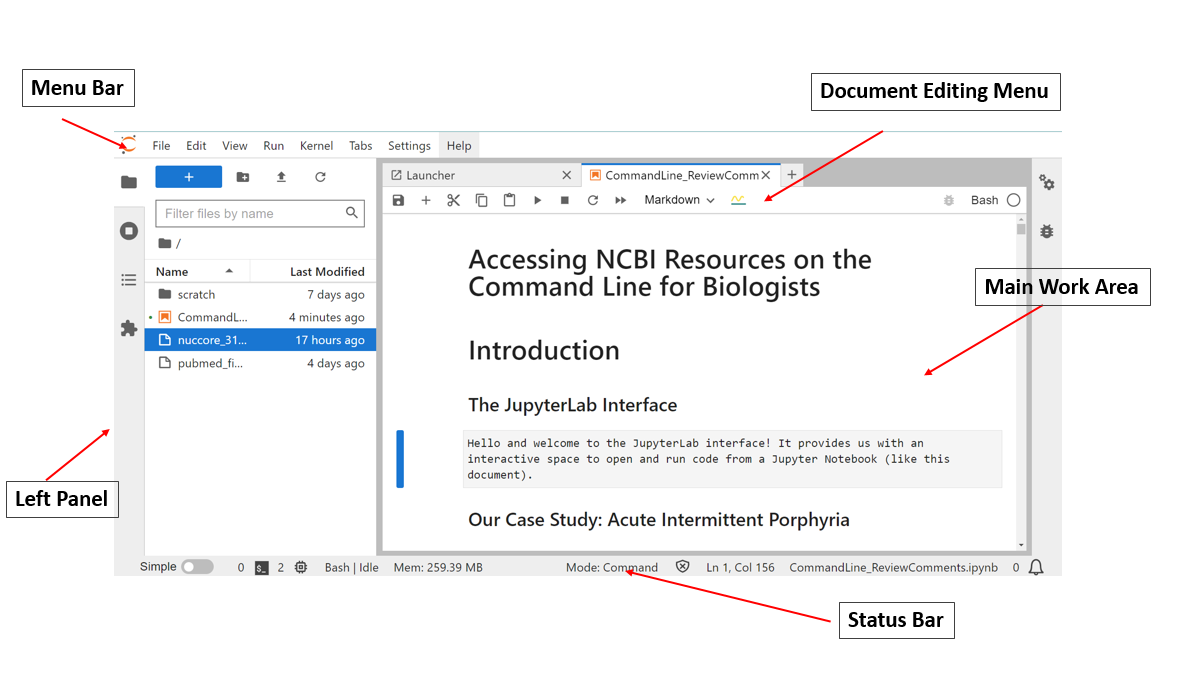
</div>

**Main Work Area:**

The main work area in JupyterLab enables you to arrange documents (notebooks, text files, etc.) and other activities (terminals, code consoles, etc.) into panels of tabs that can be resized or subdivided. Drag a tab to the center of a tab panel to move the tab to the panel. Subdivide a tab panel by dragging a tab to the left, right, top, or bottom of the panel.


**Left Sidebar:**

The left sidebar contains a number of commonly-used tabs including:
* a file browser window - as we create files today you will see them appear here.
* a list of tabs and kernels running 
* the table of contents - very helpful if you get lost in a long document! 
* the extension manager

We will be mainly taking advantage of the **Table of Contents** and **File Browser** features. Note that there is an option to hide the Left Sidebar under the **View** menu if you want to focus just on the document at hand. 

**Menu bar**

The menu bar at the top of JupyterLab has top-level menus for actions available in JupyterLab and their keyboard shortcuts. The default menus are:

* File: actions related to files and directories
* Edit: actions related to editing documents and other activities
* View: actions that alter the appearance of JupyterLab
* Run: actions for running code in different activities such as notebooks and code consoles
* Kernel: actions for managing kernels, which are separate processes for running code
* Tabs: a list of the open documents and activities in the dock panel
* Settings: common settings and an advanced settings editor
* Help: a list of JupyterLab and kernel help links



**Document Editing Menu**

This strip of buttons houses most options you will need to quickly access when editing this document or writing code, such as:

* Saving the document
* Adding a cell below 
* Cutting, copying and pasting a cell
* Options for actually running code 
* Switching between actual code and Markdown, styled text that is not interpreted as code. 
* Looking at what kernel (language) this document is running. 

**Status bar**: 

This helps us keep track of the activity happening in this instance of JupyterLab. For example: 

* How many terminal windows and tabs are open
* Whether or not any code is currently running
* How much memory we are currently using 
* Where we are in the cell and document 

This is also where you can switch back and forth from the **Simple** interface, which is really nice if you want to just focus on one document. 

**Learn more about JupyterLab and Jupyter Notebooks:**
* [Learn about the whole Jupyter Project](https://jupyter.org/)
* [Jupyter Installation and Using Jupyter in your browser](https://docs.jupyter.org/en/latest/start/index.html#try-in-your-browser-no-installation-needed) 
* [Review of the JupyterLab Interface](https://jupyterlab.readthedocs.io/en/stable/user/interface.html)

**More resources** 

These are very good, extensive tutorials for learning the command line in depth: 
* [Software Carpentry Shell Novice Curriculum](https://swcarpentry.github.io/shell-novice/)
* [Data Science Workbook Intro to Command Line](https://datascience.101workbook.org/02-IntroToCommandLine/00-IntroToCommandLine-LandingPage.html)

There are also many references for different Bash functions, such as: 
* [Computer Hope walkthrough of common bash commands](https://www.computerhope.com/unix/ubash.htm)
* [Extensive manual for all Bash commands from the Free Software Foundation](https://www.gnu.org/software/bash/manual/bash.html) 
* [A-Z Index of Bash Commands](https://ss64.com/bash/)

Extended Documentation About EDirect: 
* [Entrez Direct Reference Booklet](https://ftp.ncbi.nlm.nih.gov/pub/factsheets/Booklet_EntrezDirect.pdf)
* [Entrez Direct: E-utilities on the Unix Command Line (NCBI Bookhelf)](https://www.ncbi.nlm.nih.gov/books/NBK179288/)

[EDirect-Related NCBI Youtube Videos](https://www.youtube.com/@NLMNIH/search?query=Edirect)

**Note**: Some of these might be slightly out of date as EDirect is still actively being developed and updated. 


### Appendix 2: Installing EDirect

**On your own computer**: If you want to be able to run the EDirect commands on your local laptop or desktop, you can look into installing the tool suite per the instructions listed on the first page of this [EDirect user guide](https://www.ncbi.nlm.nih.gov/books/NBK179288/). These instructions will also work in a Jupyter Bash environment. 

**MyBinder**: This notebook will be available in an environment that already has EDirect installed using a service called [MyBinder](https://mybinder.org/). 
